<a href="https://colab.research.google.com/github/nickgulrajani/AIOps/blob/main/DatadogPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)  # Ensure reproducibility


In [2]:
class MetricSimulator:
    """Simulates system metrics with optional anomaly injection."""
    def __init__(self, start_time, end_time, freq):
        self.time_range = pd.date_range(start=start_time, end=end_time, freq=freq)

    def generate_metric(self, mean, std, name):
        values = np.random.normal(mean, std, len(self.time_range))
        return pd.DataFrame({'Time': self.time_range, name: values})

    def inject_anomaly(self, data, metric_name, start_index, end_index, shift_mean, shift_std):
        data.loc[start_index:end_index, metric_name] += np.random.normal(shift_mean, shift_std, end_index - start_index + 1)
        return data

class LogSimulator:
    """Simulates application log entries with variable severity levels."""
    def __init__(self, time_range):
        self.time_range = time_range

    def generate_logs(self, log_levels, log_probs, anomaly_period, anomaly_level):
        log_counts = np.random.choice(log_levels, size=len(self.time_range), p=log_probs)
        start_index, end_index = anomaly_period
        log_counts[start_index:end_index + 1] = anomaly_level
        return pd.DataFrame({'Time': self.time_range, 'Log Level': log_counts})


In [3]:
import pandas as pd
import numpy as np

class MetricSimulator:
    """Simulates system metrics with optional anomaly injection."""
    def __init__(self, start_time, end_time, freq):
        self.time_range = pd.date_range(start=start_time, end=end_time, freq=freq)

    def generate_metric(self, mean, std, name):
        values = np.random.normal(mean, std, len(self.time_range))
        data = pd.DataFrame({'Time': self.time_range, name: values})
        # Additional time-based features
        data['Hour'] = data['Time'].dt.hour
        data['DayOfWeek'] = data['Time'].dt.dayofweek
        return data

    def inject_anomaly(self, data, metric_name, start_index, end_index, shift_mean, shift_std):
        data.loc[start_index:end_index, metric_name] += np.random.normal(shift_mean, shift_std, end_index - start_index + 1)
        return data

# Initialize the metric simulator
metric_simulator = MetricSimulator("2024-02-17 00:00", "2024-02-17 23:55", "5min")

# Generate metrics data with additional features
cpu_data = metric_simulator.generate_metric(50, 10, 'CPU Usage (%)')
memory_data = metric_simulator.generate_metric(30, 5, 'Memory Usage (%)')
network_data = metric_simulator.generate_metric(200, 50, 'Network Traffic (MBps)')

# Inject anomalies
cpu_data = metric_simulator.inject_anomaly(cpu_data, 'CPU Usage (%)', 50, 60, 30, 5)
memory_data = metric_simulator.inject_anomaly(memory_data, 'Memory Usage (%)', 220, 230, 20, 5)
network_data = metric_simulator.inject_anomaly(network_data, 'Network Traffic (MBps)', 100, 110, 100, 25)

# Generate logs data
log_simulator = LogSimulator(metric_simulator.time_range)
logs_data = log_simulator.generate_logs(['INFO', 'WARN', 'ERROR'], [0.7, 0.2, 0.1], (180, 190), 'ERROR')


In [4]:
# Merge dataframes to create the system_metrics dataframe
system_metrics = cpu_data.merge(memory_data, on='Time').merge(network_data, on='Time')


In [5]:
# Assuming system_metrics dataframe is already defined and includes 'Network Traffic (MBps)'
X = np.arange(len(system_metrics)).reshape(-1, 1)  # Time as a feature
y_network = system_metrics['Network Traffic (MBps)'].values

# Splitting the data into training and testing sets
X_train_network, X_test_network, y_train_network, y_test_network = train_test_split(X, y_network, test_size=0.2, random_state=42)

# Training the model
model_network = LinearRegression()
model_network.fit(X_train_network, y_train_network)

# Making predictions
y_network_pred = model_network.predict(X_test_network)


In [6]:
X = np.arange(len(system_metrics)).reshape(-1, 1)  # Index as a feature
y_cpu = system_metrics['CPU Usage (%)'].values
X_train_cpu, X_test_cpu, y_train_cpu, y_test_cpu = train_test_split(X, y_cpu, test_size=0.2, random_state=42)

model_cpu = LinearRegression()
model_cpu.fit(X_train_cpu, y_train_cpu)
y_cpu_pred = model_cpu.predict(X_test_cpu)

mse_cpu = mean_squared_error(y_test_cpu, y_cpu_pred)


In [7]:
y_memory = system_metrics['Memory Usage (%)'].values
X_train_memory, X_test_memory, y_train_memory, y_test_memory = train_test_split(X, y_memory, test_size=0.2, random_state=42)

model_memory = LinearRegression()
model_memory.fit(X_train_memory, y_train_memory)
y_memory_pred = model_memory.predict(X_test_memory)

mse_memory = mean_squared_error(y_test_memory, y_memory_pred)


In [8]:
y_network = system_metrics['Network Traffic (MBps)'].values
X_train_network, X_test_network, y_train_network, y_test_network = train_test_split(X, y_network, test_size=0.2, random_state=42)

model_network = LinearRegression()
model_network.fit(X_train_network, y_train_network)
y_network_pred = model_network.predict(X_test_network)

mse_network = mean_squared_error(y_test_network, y_network_pred)



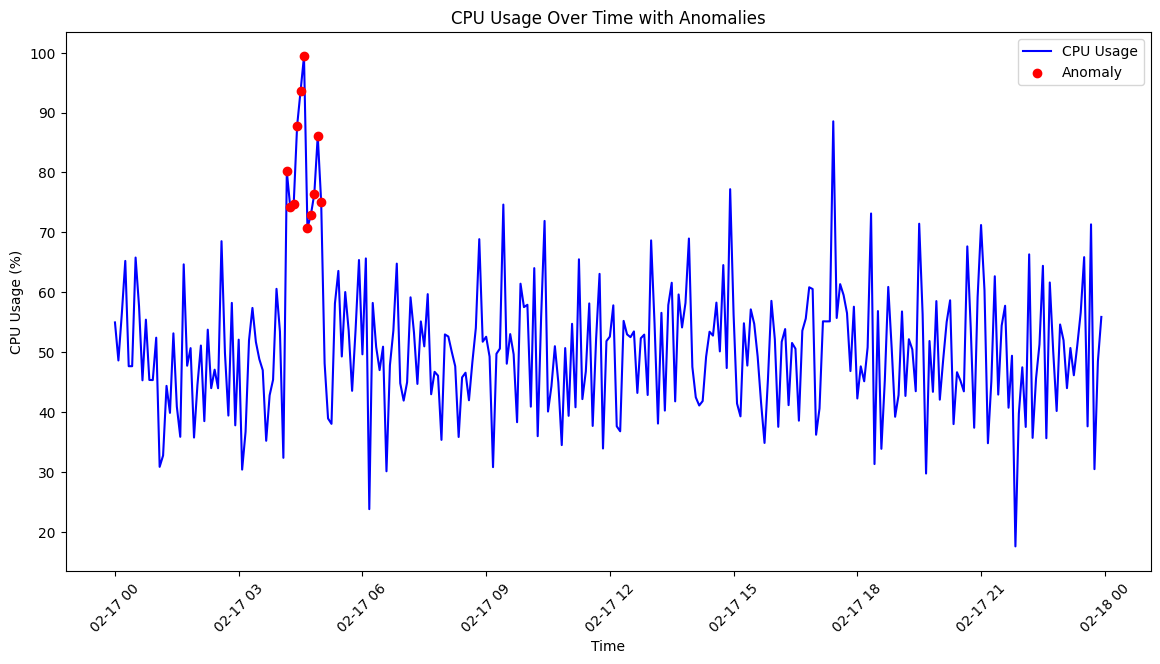

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 7))

# Plotting the normal CPU usage trend
plt.plot(cpu_data['Time'], cpu_data['CPU Usage (%)'], label='CPU Usage', color='blue')

# Highlighting anomalies
# This assumes you know the indices or conditions for anomalies; adjust accordingly
anomalies = cpu_data.loc[50:60]  # Adjust this based on your actual anomaly conditions or indices
plt.scatter(anomalies['Time'], anomalies['CPU Usage (%)'], color='red', label='Anomaly', zorder=5)

plt.title('CPU Usage Over Time with Anomalies')
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


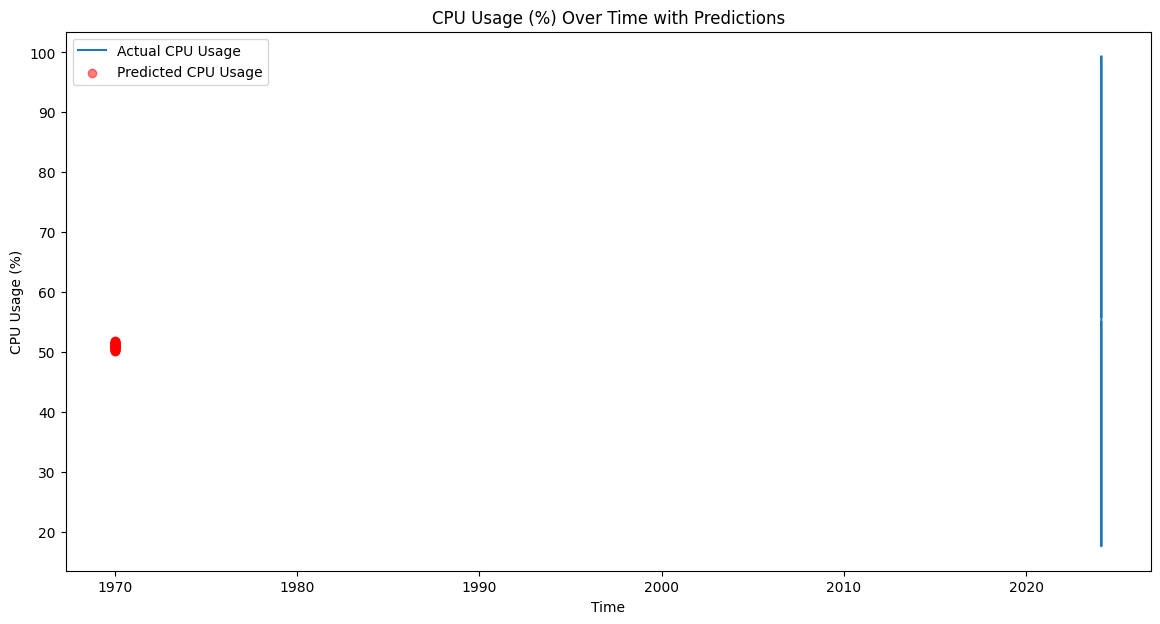

CPU Usage (%) Forecasting Summary:
MSE: 105.77
The CPU usage prediction model's performance is below expectations.




In [10]:
# Visualization for CPU Usage
plt.figure(figsize=(14, 7))
plt.plot(system_metrics['Time'], system_metrics['CPU Usage (%)'], label='Actual CPU Usage')
plt.scatter(X_test_cpu, y_cpu_pred, color='red', label='Predicted CPU Usage', alpha=0.5)
plt.title('CPU Usage (%) Over Time with Predictions')
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.show()

# Summary Output for CPU Usage
print("CPU Usage (%) Forecasting Summary:")
print(f"MSE: {mse_cpu:.2f}")
if mse_cpu < 100:  # Example threshold
    print("The CPU usage prediction model is performing within acceptable limits.")
else:
    print("The CPU usage prediction model's performance is below expectations.")
print("\n")


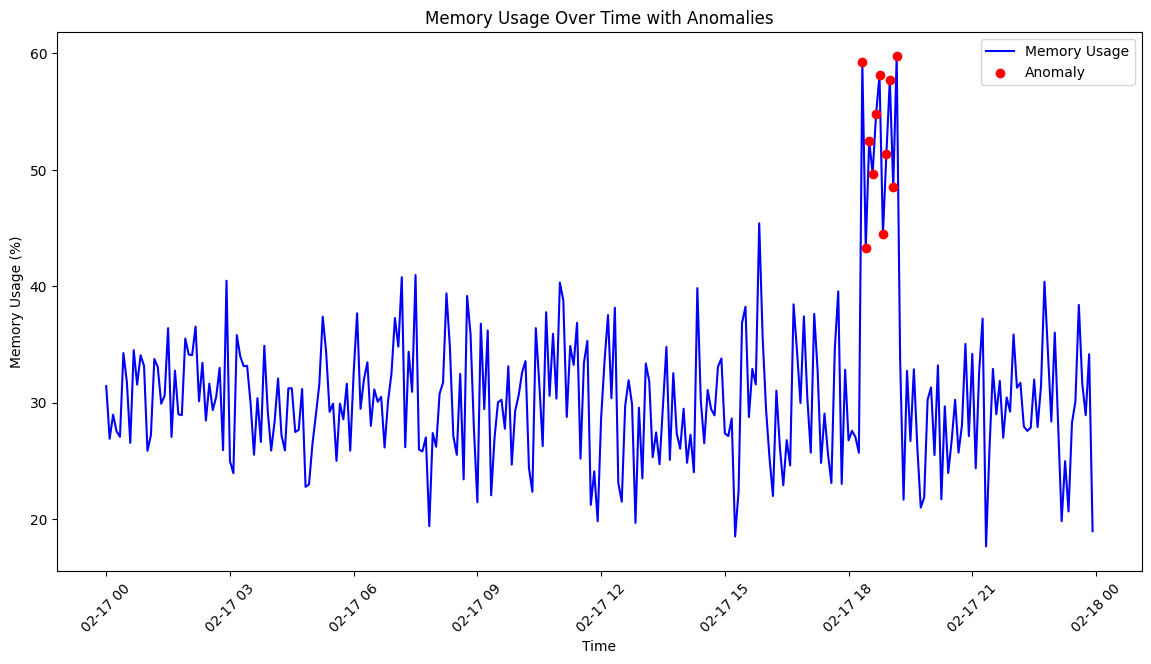

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 7))

# Plotting the normal memory usage trend
plt.plot(system_metrics['Time'], system_metrics['Memory Usage (%)'], label='Memory Usage', color='blue')

# Highlighting anomalies
# Assuming anomalies were injected at specific indices, adjust as necessary
# If your anomalies are not index-based, adjust the selection method accordingly
anomaly_indices = [220, 230]  # Example indices where anomalies were injected
anomalies = system_metrics.loc[anomaly_indices[0]:anomaly_indices[1]]
plt.scatter(anomalies['Time'], anomalies['Memory Usage (%)'], color='red', label='Anomaly', zorder=5)

plt.title('Memory Usage Over Time with Anomalies')
plt.xlabel('Time')
plt.ylabel('Memory Usage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


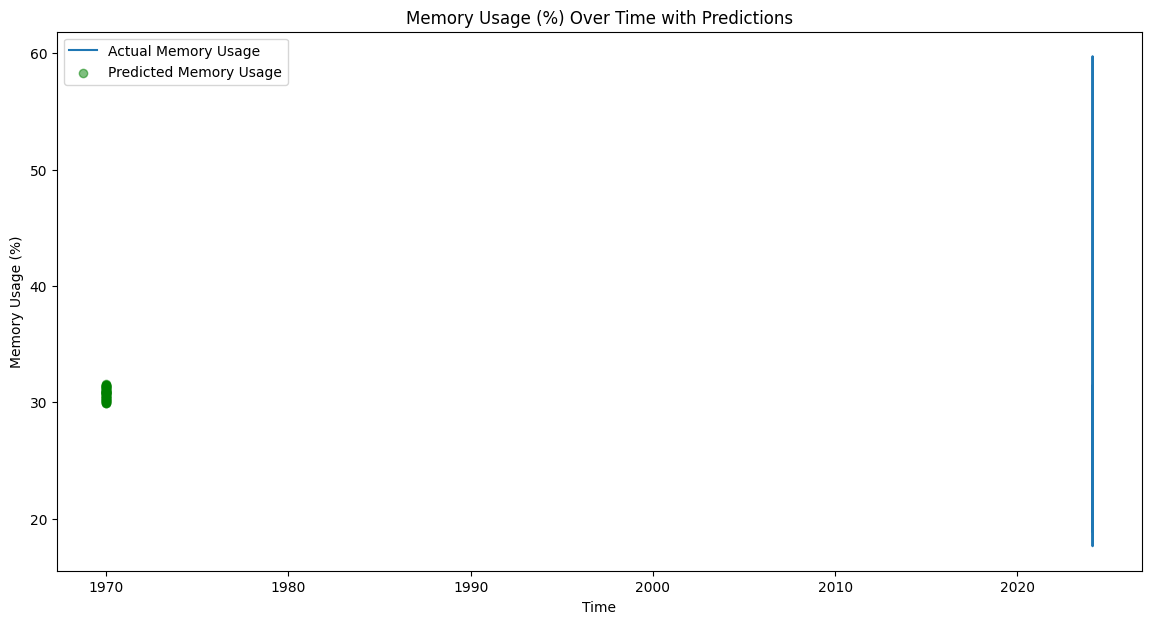

Memory Usage (%) Forecasting Summary:
MSE: 42.74
The memory usage prediction model is performing within acceptable limits.




In [12]:
# Visualization for Memory Usage
plt.figure(figsize=(14, 7))
plt.plot(system_metrics['Time'], system_metrics['Memory Usage (%)'], label='Actual Memory Usage')
plt.scatter(X_test_memory, y_memory_pred, color='green', label='Predicted Memory Usage', alpha=0.5)
plt.title('Memory Usage (%) Over Time with Predictions')
plt.xlabel('Time')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.show()

# Summary Output for Memory Usage
print("Memory Usage (%) Forecasting Summary:")
print(f"MSE: {mse_memory:.2f}")
if mse_memory < 50:  # Example threshold
    print("The memory usage prediction model is performing within acceptable limits.")
else:
    print("The memory usage prediction model's performance is below expectations.")
print("\n")

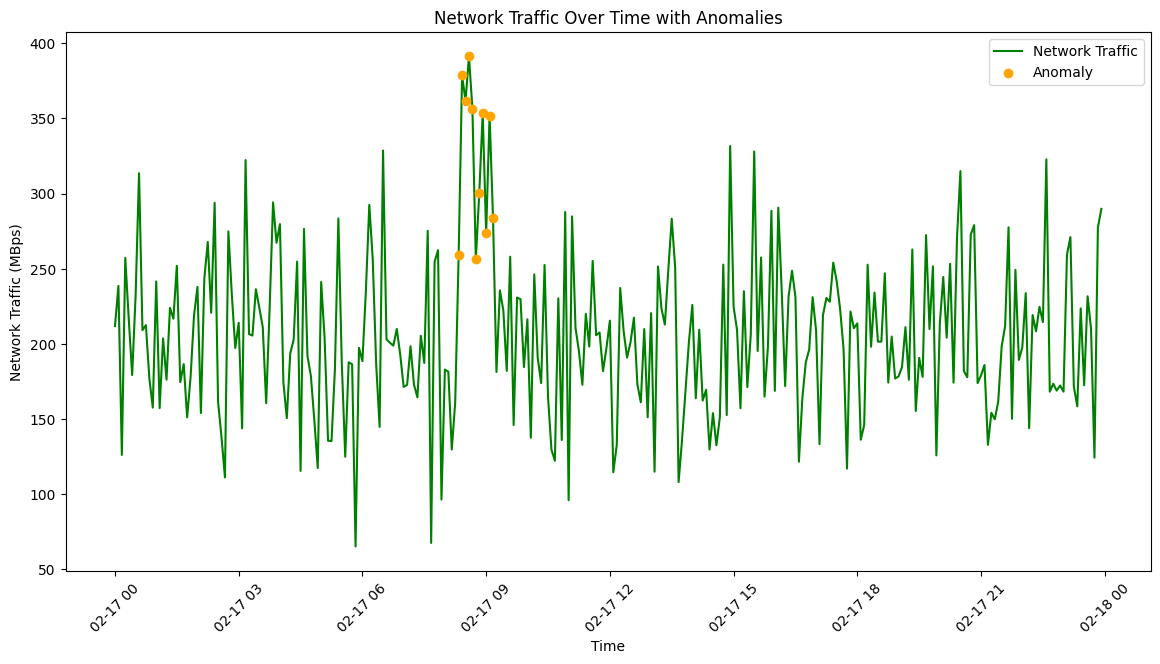

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 7))

# Assuming 'system_metrics' contains your network traffic data along with a 'Time' column
# Plotting the normal network traffic trend
plt.plot(system_metrics['Time'], system_metrics['Network Traffic (MBps)'], label='Network Traffic', color='green')

# Highlighting anomalies
# Assuming anomalies are at known indices or conditions, adjust as necessary
# Example: Anomalies injected between indices 100 and 110
anomalies = system_metrics.loc[100:110]
plt.scatter(anomalies['Time'], anomalies['Network Traffic (MBps)'], color='orange', label='Anomaly', zorder=5)

plt.title('Network Traffic Over Time with Anomalies')
plt.xlabel('Time')
plt.ylabel('Network Traffic (MBps)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


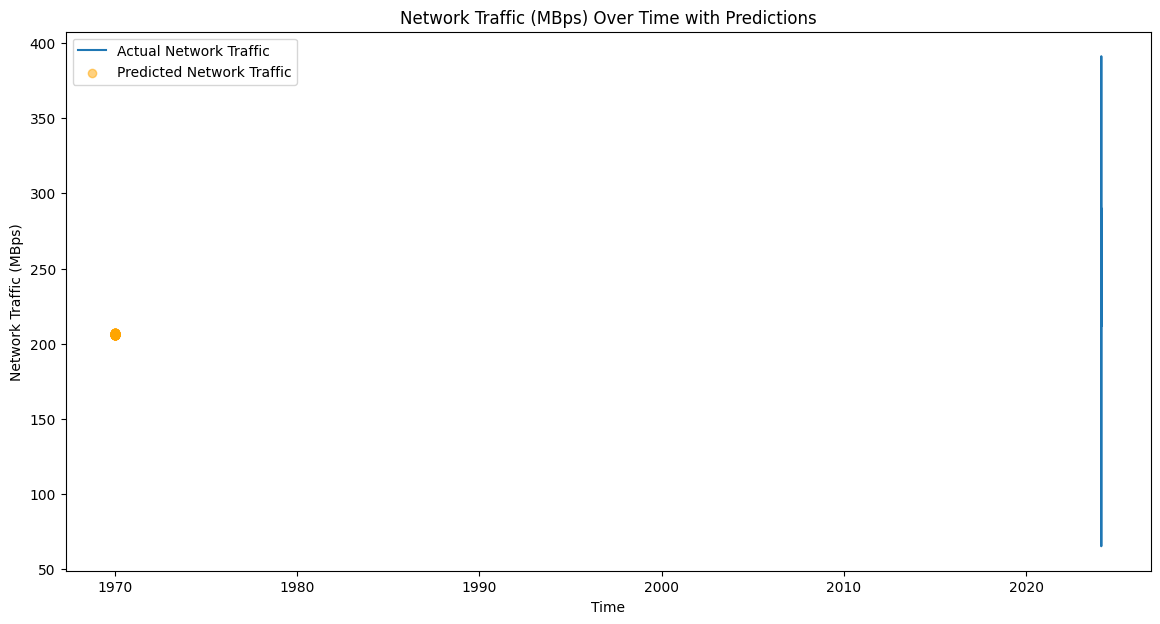

Network Traffic (MBps) Forecasting Summary:
MSE: 2725.77
The network traffic prediction model is performing within acceptable limits.


In [14]:
# Visualization for Network Traffic
plt.figure(figsize=(14, 7))
plt.plot(system_metrics['Time'], system_metrics['Network Traffic (MBps)'], label='Actual Network Traffic')
plt.scatter(X_test_network, y_network_pred, color='orange', label='Predicted Network Traffic', alpha=0.5)
plt.title('Network Traffic (MBps) Over Time with Predictions')
plt.xlabel('Time')
plt.ylabel('Network Traffic (MBps)')
plt.legend()
plt.show()

# Summary Output for Network Traffic
print("Network Traffic (MBps) Forecasting Summary:")
print(f"MSE: {mse_network:.2f}")
if mse_network < 3000:  # Example threshold
    print("The network traffic prediction model is performing within acceptable limits.")
else:
    print("The network traffic prediction model's performance is below expectations.")


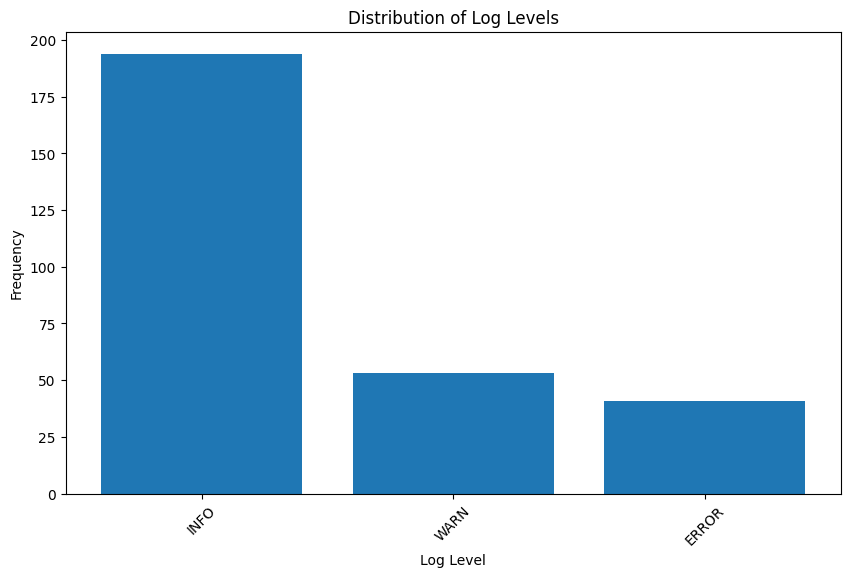

In [15]:
# Assuming matplotlib is already imported and set up for inline plotting

# Count the occurrences of each log level
log_level_counts = logs_data['Log Level'].value_counts()

# Create a bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(log_level_counts.index, log_level_counts.values)
plt.title('Distribution of Log Levels')
plt.xlabel('Log Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you've already prepared your dataset with additional features:
X = system_metrics[['Hour', 'DayOfWeek']]  # Using time-based features for prediction
y = system_metrics['Memory Usage (%)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
model_rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred)
print("Memory Usage (%) Forecasting with Random Forest Summary:")
print(f"MSE: {mse_rf:.2f}")
if mse_rf < 50:  # Adjust this threshold based on your criteria
    print("The memory usage prediction model is performing within acceptable limits.")
else:
    print("The memory usage prediction model's performance is below expectations.")


Memory Usage (%) Forecasting with Random Forest Summary:
MSE: 44.30
The memory usage prediction model is performing within acceptable limits.


In [17]:
# Assuming system_metrics already exists and includes a 'Time' column
# Include 'Time' in X but drop it before model training
X = system_metrics[['Time', 'Hour', 'DayOfWeek']]  # 'Time' included for alignment
y = system_metrics['Memory Usage (%)']

# When splitting, keep 'Time' for alignment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop 'Time' from X_train and X_test before training the model
X_train_model = X_train.drop(columns=['Time'])
X_test_model = X_test.drop(columns=['Time'])

# Train your model using X_train_model and X_test_model where 'Time' is excluded from the features
# model_rf.fit(X_train_model, y_train) etc.

# When plotting, use X_test which includes 'Time' for alignment
plot_data = X_test.copy()
plot_data['Actual Memory Usage (%)'] = y_test.reset_index(drop=True)  # Reset index to align with X_test
plot_data['Predicted Memory Usage (%)'] = y_pred

# Now sort and plot, 'Time' column is present in plot_data
plot_data.sort_values('Time', inplace=True)


In [18]:
import numpy as np

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by adding a tiny number to the denominator
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100

# Calculate MAPE for each metric
mape_cpu = calculate_mape(y_test_cpu, y_cpu_pred)
mape_memory = calculate_mape(y_test_memory, y_memory_pred)
mape_network = calculate_mape(y_test_network, y_network_pred)

# Print the MAPE results
print(f"CPU Usage MAPE: {mape_cpu:.2f}%")
print(f"Memory Usage MAPE: {mape_memory:.2f}%")
print(f"Network Traffic MAPE: {mape_network:.2f}%")


CPU Usage MAPE: 16.54%
Memory Usage MAPE: 15.79%
Network Traffic MAPE: 21.37%


In [19]:
import numpy as np

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by adding a tiny number to the denominator
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100

# Function to interpret MAPE
def interpret_mape(mape):
    if mape < 10:
        return "excellent accuracy."
    elif mape < 20:
        return "good accuracy."
    elif mape < 30:
        return "fair accuracy; consider improvements."
    else:
        return "poor accuracy; improvements needed."

# Calculate MAPE for each metric
mape_cpu = calculate_mape(y_test_cpu, y_cpu_pred)
mape_memory = calculate_mape(y_test_memory, y_memory_pred)
mape_network = calculate_mape(y_test_network, y_network_pred)

# Print the MAPE results with interpretations
print(f"CPU Usage MAPE: {mape_cpu:.2f}% - This indicates {interpret_mape(mape_cpu)}")
print(f"Memory Usage MAPE: {mape_memory:.2f}% - This indicates {interpret_mape(mape_memory)}")
print(f"Network Traffic MAPE: {mape_network:.2f}% - This indicates {interpret_mape(mape_network)}")


CPU Usage MAPE: 16.54% - This indicates good accuracy.
Memory Usage MAPE: 15.79% - This indicates good accuracy.
Network Traffic MAPE: 21.37% - This indicates fair accuracy; consider improvements.


In [20]:
import numpy as np

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by adding a tiny number to the denominator
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100

# Calculate MAPE for each metric
mape_cpu = calculate_mape(y_test_cpu, y_cpu_pred)
mape_memory = calculate_mape(y_test_memory, y_memory_pred)
mape_network = calculate_mape(y_test_network, y_network_pred)

# Print the MAPE results with detailed descriptions
print(f"CPU Usage MAPE: {mape_cpu:.2f}%: On average, the predictions for CPU usage are off by {mape_cpu:.2f}% from the actual values. This means that when the model predicts the CPU usage, its predictions typically deviate from the true values by this percentage.")

print(f"Memory Usage MAPE: {mape_memory:.2f}%: The predictions for Memory usage are, on average, {mape_memory:.2f}% different from the actual observed values. Similar to CPU usage, this indicates the average deviation of the predicted memory usage from the actual memory usage.")

print(f"Network Traffic MAPE: {mape_network:.2f}%: For Network Traffic, the model's predictions are, on average, {mape_network:.2f}% away from the actual values. This is the highest error among the three metrics, indicating that the model's predictions for network traffic tend to be less accurate than those for CPU and Memory usage.")


CPU Usage MAPE: 16.54%: On average, the predictions for CPU usage are off by 16.54% from the actual values. This means that when the model predicts the CPU usage, its predictions typically deviate from the true values by this percentage.
Memory Usage MAPE: 15.79%: The predictions for Memory usage are, on average, 15.79% different from the actual observed values. Similar to CPU usage, this indicates the average deviation of the predicted memory usage from the actual memory usage.
Network Traffic MAPE: 21.37%: For Network Traffic, the model's predictions are, on average, 21.37% away from the actual values. This is the highest error among the three metrics, indicating that the model's predictions for network traffic tend to be less accurate than those for CPU and Memory usage.


In [21]:
# Save the datasets to CSV files in the current working directory
cpu_data.to_csv('cpu_data.csv', index=False)
memory_data.to_csv('memory_data.csv', index=False)
network_data.to_csv('network_data.csv', index=False)

print("Datasets saved to CSV files in the current working directory:")
print("CPU data: cpu_data.csv")
print("Memory data: memory_data.csv")
print("Network data: network_data.csv")


Datasets saved to CSV files in the current working directory:
CPU data: cpu_data.csv
Memory data: memory_data.csv
Network data: network_data.csv
